In [15]:
import shutil
import os
import random

# Source and destination folder paths
source_folder = 'UMNData/val/images/'
mask_folder = 'UMNData/val/masks/'

# read all the images and save the names in a list
images = os.listdir(source_folder)
mask = os.listdir(mask_folder)
print(images)
print(mask)
# take 10% of the images randomly and move them to the destination folder
dest_folder = 'Dataset/target_train/images/'
mask_dest_folder = 'Dataset/target_train/masks/'

# shuffle the images with masks 
random.shuffle(images)
#take 10% of the images randomly and move them to the destination folder
#if dest_folder is not os.path.exists(dest_folder): make it
if not os.path.exists(dest_folder):
    os.makedirs(dest_folder)
if not os.path.exists(mask_dest_folder):
    os.makedirs(mask_dest_folder)
for i in range(int(len(images)*1)):
    shutil.move(source_folder + images[i], dest_folder + images[i])
    # get corresponding by name and move it
    shutil.move(mask_folder + images[i], mask_dest_folder + images[i])


['22_05.npy', '22_13.npy', '19_03.npy', '20_14.npy', '21_07.npy', '23_04.npy', '23_20.npy', '21_15.npy', '22_18.npy', '21_16.npy', '20_16.npy', '21_08.npy', '22_01.npy', '21_09.npy', '19_23.npy', '22_23.npy', '19_04.npy', '20_10.npy', '23_10.npy', '19_05.npy', '23_24.npy', '19_09.npy', '19_16.npy', '19_14.npy', '19_21.npy', '22_21.npy', '22_09.npy', '20_24.npy', '23_07.npy', '20_08.npy', '21_10.npy', '20_20.npy', '21_02.npy', '21_21.npy', '22_11.npy', '21_05.npy', '20_17.npy', '21_11.npy', '20_22.npy', '19_07.npy', '19_17.npy', '23_09.npy', '23_06.npy', '19_02.npy', '20_03.npy', '21_17.npy', '21_04.npy', '23_08.npy', '23_11.npy', '19_15.npy', '23_02.npy', '20_02.npy', '20_21.npy', '22_14.npy', '22_19.npy', '20_07.npy', '22_06.npy', '22_12.npy', '21_24.npy', '19_08.npy', '23_14.npy', '20_12.npy', '23_12.npy', '20_00.npy', '23_23.npy', '23_18.npy', '21_12.npy', '21_03.npy', '23_21.npy', '21_23.npy', '20_23.npy', '19_12.npy', '22_00.npy', '21_20.npy', '22_03.npy', '22_22.npy', '19_18.npy'

In [19]:
#convert to tif 
import os
import glob
import numpy as np
dest_folder = 'Dataset/target_train/images/'
mask_dest_folder = 'Dataset/target_train/masks/'
from skimage import io
for filename in glob.glob(os.path.join(dest_folder, '*.npy')):
    img = np.load(filename)
    #remove the .npy and add .tif
    os.remove(filename)
    io.imsave(filename[:-4] + '.tif', img)
for filename in glob.glob(os.path.join(mask_dest_folder, '*.npy')):
    img = np.load(filename) 
    #remove the .npy and add .tif
    io.imsave(filename[:-4] + '.tif', img)
    

/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/target_train/masks/22_05.tif is a low contrast image
  io.imsave(filename[:-4] + '.tif', img)
/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/target_train/masks/22_13.tif is a low contrast image
  io.imsave(filename[:-4] + '.tif', img)
/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/target_train/masks/19_03.tif is a low contrast image
  io.imsave(filename[:-4] + '.tif', img)
/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/target_train/masks/20_14.tif is a low contrast image
  io.imsave(filename[:-4] + '.tif', img)
/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/target_train/masks/21_07.tif is a low contrast image
  io.imsave(filename[:-4] + '.tif', img)
/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/target_train/masks/23_04.tif is a low contrast image
  io.imsave(filename[:-4] + '.tif', img)
/tmp/ipykernel_1182375/2708760886.py:16: UserWarning: Dataset/ta

In [22]:
import os
import glob

dest_folder = 'Dataset/target_train/masks/'

# Use the correct glob pattern, which is '*.npy'
for filename in glob.glob(os.path.join(dest_folder, '*.npy')):
    os.remove(filename)


In [13]:

# delete a folder
folder_list = ['Dataset/train/clean_images/', 'Dataset/train/noisy_images/', 'Dataset/val/clean_images/', 'Dataset/test/clean_images/', 'Dataset/test/noisy_images/', 'Dataset/val/noisy_images/']
for folder_to_delete in folder_list:
    if os.path.exists(folder_to_delete):
        shutil.rmtree(folder_to_delete)


In [34]:
# delete a folder
folder_to_delete = 'Dataset/test/clean_images/'
shutil.rmtree(folder_to_delete)
folder_to_delete = 'Dataset/target_train/noisy_masks/'
shutil.rmtree(folder_to_delete)

In [24]:
# loop over the images in 128_patches/images
from PIL import Image
from skimage import io
import os
directory = "Dataset/target_train/masks/"
for filename in os.listdir(directory):
    img = io.imread(os.path.join(directory, filename))
    #print(img.shape)

    # Convert the NumPy array to an Image object
    img = Image.fromarray(img)
    #convert to grayscale
    img = img.convert('L')
    #img=img.convert("RGB")
    img = img.resize((128, 128))

    # Save the converted image to a file
    img.save(os.path.join(directory, filename))
     

(128, 128)
(128, 128)
uint8
[0 1 2 3 4 5 6 7 8 9]


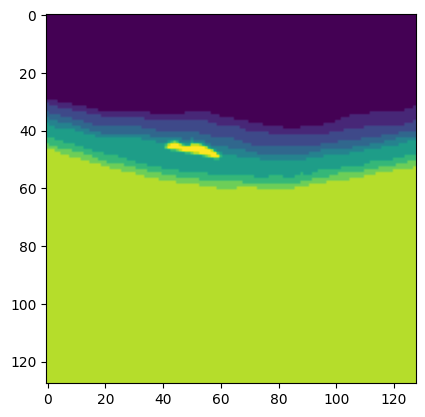

In [31]:
#READ IMAGE FROM FOLDER AND PRINT SHAPE
root_dir = 'Dataset/target_test/masks/Subject_04_09.tif'

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img = Image.open(root_dir)
print(img.size)
img = np.array(img)

print(img.shape)
#print type(img)
print(img.dtype)
plt.imshow(img)

# print num of unique values
print(np.unique(img))


(224, 224)
(224, 224)
uint8
[0 1 2 3 4 5 6 7 8]


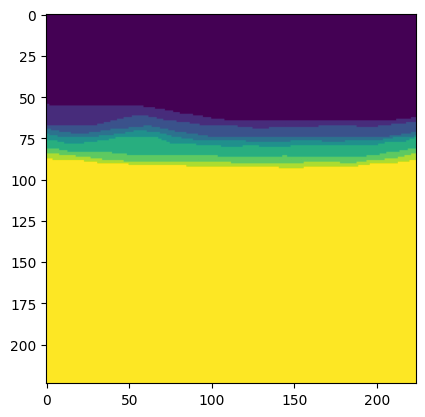

In [70]:
#READ IMAGE FROM FOLDER AND PRINT SHAPE
root_dir = 'Dataset/test/masks/Subject_09_00.tif'

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img = Image.open(root_dir)
print(img.size)
img = np.array(img)

print(img.shape)
#print type(img)
print(img.dtype)
plt.imshow(img)

# print num of unique values
print(np.unique(img)) # 0, 1, 2, 3, 4, 5, 6, 7, 8

#add values to make it 11 classes 
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
directory = "Dataset/target_test/masks/"
  




(128, 128)
(128, 128, 3)
uint8


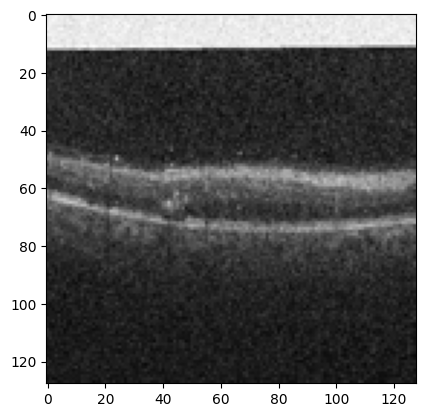

In [1]:
#READ IMAGE FROM FOLDER AND PRINT SHAPE
root_dir = 'Dataset/train/images/Subject_01_00.tif'

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


img = Image.open(root_dir)
print(img.size)
img = np.array(img)
print(img.shape)
print(img.dtype)
plt.imshow(img)
